In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os

plt.style.use('seaborn-whitegrid')

In [2]:
sueldos = pd.read_excel('tabulador_pe2019.xls', header = 9)
sueldos.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


#### <strong>¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia? </strong> 

In [3]:
sueldos['SUELDO MENSUAL BRUTO'].mean()

49467.37593510606

In [4]:
sueldos['SUELDO MENSUAL NETO'].mean()

35829.35357437967

#### <strong>Media y moda de las contribuciones del sueldo de un trabajador. Rango interquartil de la distribución.</strong> 

In [5]:
sueldos['SUELDO MENSUAL BRUTO'].mode()

0     9783.850296
1    11440.563407
dtype: float64

In [6]:
sueldos['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [7]:
sueldos.describe()

,NIVEL,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO
count,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,8.670886,14427.528244,2551.057005,1.913100e+03,4224.316456,13095.416510,13255.957722,49467.375935,11086.965356,2178.762464,372.294541,35829.353574
std,5.658489,12639.319936,1887.367119,2.745919e-12,5917.564742,12561.423626,16283.009818,48932.415025,14333.022606,1632.291459,257.338508,32902.782725
min,1.000000,3080.400000,600.678000,1.913100e+03,450.000000,1572.330000,0.000000,7616.508000,263.883632,508.266000,92.412000,6751.946368
25%,4.000000,4564.185105,890.016096,1.913100e+03,450.000000,3599.725827,936.540000,12353.567028,1173.958791,753.090542,136.925553,10289.592141
50%,8.000000,9458.572628,1844.421662,1.913100e+03,1012.000000,8611.753511,6545.820000,28148.204516,4414.420662,1560.664484,283.757179,22078.225282
75%,13.000000,22680.796123,4422.755244,1.913100e+03,4906.000000,16798.836156,19519.330000,70240.817524,15454.848684,3742.331360,680.423884,50363.213596
max,22.000000,59804.327930,5843.070000,1.913100e+03,25897.000000,64294.837780,75373.990000,233126.325711,69584.321342,5082.660000,760.410000,157698.934369


In [8]:
sueldos.describe()['SUELDO MENSUAL BRUTO']

count        79.000000
mean      49467.375935
std       48932.415025
min        7616.508000
25%       12353.567028
50%       28148.204516
75%       70240.817524
max      233126.325711
Name: SUELDO MENSUAL BRUTO, dtype: float64

In [9]:
sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%' : '75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

#### <strong>¿Cuál es la dispersión de sueldos?</strong> 

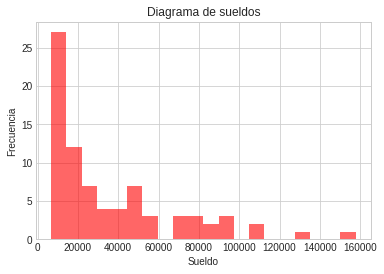

In [21]:
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 20, alpha = 0.6, color = 'red')
plt.title('Diagrama de sueldos')
plt.xlabel('Sueldo')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
mediana = sueldos['SUELDO MENSUAL NETO'].median()

In [13]:
#Dispersión con respecto a la mediana.
np.abs(sueldos['SUELDO MENSUAL NETO'] - mediana)

0     135620.709087
1     110860.973760
2      85955.261168
3      85955.261168
4      74270.865363
5      74270.865363
6      74270.865363
7      63603.547699
8      63603.547699
9      52836.226436
10     52836.226436
11     52836.226436
12     46571.230993
13     46571.230993
14     46571.230993
15     35547.430143
16     35547.430143
17     35547.430143
18     28284.988314
19     28284.988314
20     28284.988314
21     23079.584458
22     23079.584458
23     23079.584458
24     23079.584458
25     16604.403744
26     16604.403744
27     16604.403744
28     16604.403744
29     11258.578058
          ...      
49      4843.459170
50      4843.459170
51      7087.648269
52      8502.632024
53      8502.632024
54      8502.632024
55      8502.632024
56      9419.241178
57     11788.633141
58     11788.633141
59     11788.633141
60     11788.633141
61     12468.438379
62     12468.438379
63     12468.438379
64     12468.438379
65     12468.438379
66     13783.389330
67     13783.389330


In [29]:
#Hasta el 25% de los trabajadores tiene el primer sueldos, hasta el 50% tiene el segundo sueldo y hasta el
#75% tiene el tercer sueldo.
sueldos['SUELDO MENSUAL NETO'].describe()['25%' : '75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

Valor y posición de mediana:  22078.22528193275 42
Valor y posición del tercer cuartil:  50363.2135957455 20


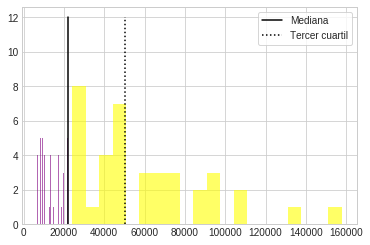

In [117]:
V = np.array(sueldos)
k, h = 0, 0
for i in range(len(V)):
    if(V[i][13] == mediana):
        k = i
    if(V[i][13] == sueldos['SUELDO MENSUAL NETO'].quantile(0.75)):
        h = i
print('Valor y posición de mediana: ', sueldos['SUELDO MENSUAL NETO'].quantile(.5), k)
print('Valor y posición del tercer cuartil: ', sueldos['SUELDO MENSUAL NETO'].quantile(.75), h)

plt.hist(sueldos[sueldos['SUELDO MENSUAL NETO'] <= mediana]['SUELDO MENSUAL NETO'], bins = k, color = 'purple', alpha = 0.6)
plt.hist(sueldos[sueldos['SUELDO MENSUAL NETO'] > mediana]['SUELDO MENSUAL NETO'], bins = h, color = 'yellow', alpha = 0.6)
plt.plot(np.ones(100) * mediana, np.linspace(0,12, 100), 'k', label = 'Mediana')
plt.plot(np.ones(12) * sueldos['SUELDO MENSUAL NETO'].quantile(.75), np.linspace(0,12,12), 'k', linestyle = ':', label = 'Tercer cuartil')
plt.legend(frameon = True)
plt.show()

#### <strong>¿Cuál es el sueldo base máximo?</strong>

In [89]:
#Trabajando con el sueldo mensual neto:
sueldos['SUELDO MENSUAL NETO'].max()

157698.9343690769

#### <strong>¿Cuál es el sueldo base mínimo?</strong>

In [90]:
#Trabajando con el sueldo mensual neto:
sueldos['SUELDO MENSUAL NETO'].min()

6751.946368

#### <strong> Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos </strong>

In [93]:
#Primero se comprueban dimensiones, la 13'va columna corresponde al Sueldo Mensual Neto.
sueldos.shape

(79, 16)

In [164]:
#Pendiente
p = ['PUESTO', 'SUELDO BASE', 'CUOTAS SEGURIDAD SOCIAL', 'PREVISIÓN SOCIAL', 'AYUDA X SERVICIOS',
            'APOYO FAMILIAR', 'GRATIFICACIÓN QUINCENAL', 'SUELDO MENSUAL BRUTO', 'IMPTO MENSUAL', 'ISSEG',
            'ISSSTE', 'SUELDO MENSUAL NETO']
Porcentaje = pd.DataFrame({"PUESTO" : sueldos[p[0]]})

Prueba = []
for i in range(len(V)):
    Prueba[i] = sueldos[p[0]][i] / sueldos[p[11]][i]
#for i in range(10):
#    Porcentaje[posicion[i + 1]] = sueldos[p[i]] + sueldos[p[11]]
    
#Porcentaje.head()
Prueba

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [109]:
a = V_c[0][3] = V_c[0][3] / V_c[0][13]
a

2.4656492922075816e-32

#### <strong> ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?</strong>

In [135]:
Diferencia = pd.DataFrame({"Puesto" : sueldos['PUESTO'], "Diferencia" : 
                           np.abs(sueldos['SUELDO MENSUAL NETO'] - sueldos['SUELDO MENSUAL NETO'].max())})
Diferencia.head()

,Puesto,Diferencia
0,GOBERNADOR/A DEL ESTADO,0.000000
1,SECRETARIO/A DE ESTADO A,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,49665.447919
3,SECRETARIO/A DE ESTADO B,49665.447919
4,SECRETARIO/A DE ESTADO C,61349.843724


#### <strong> ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? </strong>

Considerando apoyos las columnas CUOTAS SEGURIDAD SOCIAL, PREVISIÓN SOCIAL, AYUDA X SERVICIOS, APOYO FAMILIAR y GRATIFICACIÓN QUINCENAL, se tiene lo siguiente:

In [137]:
Apoyo = pd.DataFrame({"Puesto" : sueldos['PUESTO'], "Apoyos" : sueldos['CUOTAS SEGURIDAD SOCIAL'] + 
                      sueldos['PREVISIÓN SOCIAL'] + sueldos['AYUDA X SERVICIOS'] + sueldos['APOYO FAMILIAR']
                      + sueldos['GRATIFICACIÓN QUINCENAL']})
Apoyo.head()

,Puesto,Apoyos
0,GOBERNADOR/A DEL ESTADO,173321.997780
1,SECRETARIO/A DE ESTADO A,146585.629699
2,DIRECTOR/A GENERAL PARAESTATAL A,117189.695456
3,SECRETARIO/A DE ESTADO B,117189.695456
4,SECRETARIO/A DE ESTADO C,103088.308404


#### <strong>¿Cuánto dinero es utilizado en ISSSTE entre todos los puestos?</strong>

In [139]:
sueldos['ISSSTE'].sum()

29411.26871446277

In [159]:
V[:,13]

array([157698.9343690769, 132939.1990423504, 108033.48645027087,
       108033.48645027087, 96349.09064496944, 96349.09064496944,
       96349.09064496944, 85681.77298048903, 85681.77298048903,
       74914.45171783582, 74914.45171783582, 74914.45171783582,
       68649.45627535875, 68649.45627535875, 68649.45627535875,
       57625.655424524426, 57625.655424524426, 57625.655424524426,
       50363.2135957455, 50363.2135957455, 50363.2135957455,
       45157.80973951962, 45157.80973951962, 45157.80973951962,
       45157.80973951962, 38682.629025882175, 38682.629025882175,
       38682.629025882175, 38682.629025882175, 33336.80333984691,
       29988.3289175114, 29988.3289175114, 29988.3289175114,
       26918.33770243292, 24096.831542857904, 24096.831542857904,
       24096.831542857904, 24342.536939662612, 21800.520101845435,
       21800.520101845435, 21800.520101845435, 22078.22528193275,
       22078.22528193275, 19776.492237425686, 19776.492237425686,
       19776.492237425686, 1